# Linear regression with multi variables


Implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.csv contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. 

### Importing libraries and modules

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math


### Accessing and Storing Data from csv file

Text(0.5, 1.0, 'Bedrooms v/s Price')

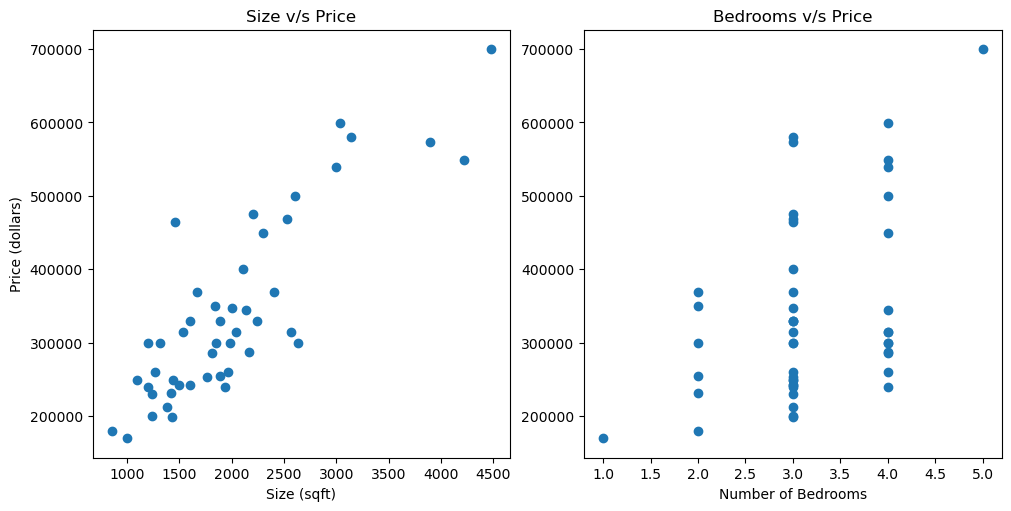

In [181]:
# House size in square feet
# Number of bedrooms

X_train = [] # size, bedroom
y_train = [] # price

with open('ex1data2.csv', newline='') as housing_data:
    reader = csv.reader(housing_data)

    for row in reader:
        x_parameters = [] 
        for i in range(2):
            x_parameters.append(float(row[i]))
        X_train.append(x_parameters)
        y_train.append(float(row[-1]))

X_train = np.array(X_train)
y_train = np.array(y_train)
# y_train = y_train.reshape(len(y_train), 1) # resizing to get shape (47,1), so that it can be later used for broadcasting

fig, axs = plt.subplots(1,2, layout="constrained")
plt.rcParams['figure.figsize'] = [10, 5]

axs[0].scatter(X_train[:,0], y_train)
axs[0].set(ylabel="Price (dollars)", xlabel="Size (sqft)")
axs[0].set_title("Size v/s Price")

axs[1].scatter(X_train[:,1], y_train)
axs[1].set(xlabel="Number of Bedrooms")
axs[1].set_title("Bedrooms v/s Price")


### Creating our Model

#### Predict function

In [174]:
def predict(X, w, b):
    return np.dot(X, w) + b

#### Feature Scaling

Text(0.5, 1.0, 'Size v/s Bedrooms')

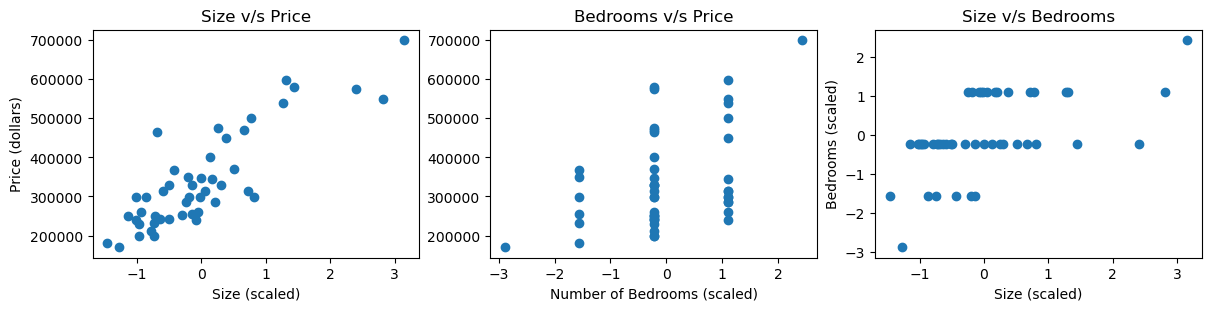

In [175]:
def feature_scale(X):
    
    # Using division by max of X -> x(i) / x(max)
    # X_max = X.max(axis=0) # returns an array of max nums from each column
    # X_scaled = X / X_max
    # return X_scaled

    # Using Mean normalisation -> x(i) - mean(x) / x(max) - x(min)
    # X_max = X.max(axis=0)
    # X_min = X.min(axis=0)
    # X_mean = X.mean(axis=0)
    # X_scaled = (X - X_mean) / (X_max - X_min)
    # return X_scaled

    # Using Z-score normalization -> x(i) - mean(x) / standard deviation(x)
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_scaled = (X - X_mean) / X_std
    return X_scaled

X_scaled = feature_scale(X_train)

fig, axs = plt.subplots(1,3, layout="constrained", figsize=(12,3))

axs[0].scatter(X_scaled[:,0], y_train)
axs[0].set(ylabel="Price (dollars)", xlabel="Size (scaled)")
axs[0].set_title("Size v/s Price")

axs[1].scatter(X_scaled[:,1], y_train)
axs[1].set(xlabel="Number of Bedrooms (scaled)")
axs[1].set_title("Bedrooms v/s Price")

axs[2].scatter(X_scaled[:,0], X_scaled[:,1])
axs[2].set(xlabel="Size (scaled)", ylabel="Bedrooms (scaled)")
axs[2].set_title("Size v/s Bedrooms")


#### Cost function

In [176]:
def cost_func(X, y, w, b):
    m = len(y)
    predictions = predict(X, w, b)
    cost = (1 / (2*m)) * np.sum((predictions - y)**2)
    return cost

#### Gradient descent algorithm, updating weights

In [183]:
def cost_derivative(X, y, w, b):
    m = y.shape[0]
    predictions = predict(X, w, b)
    predictions_dupe = predictions.reshape(len(y), 1)
    # Review this piece of code, and hopefully make it more understandable
    dj_dw = (1 / m) * np.dot(X.T, predictions_dupe)
    dj_dw = dj_dw.T
    #
    dj_db = (1 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

def update_weights(X, y, w, b, learning_rate):
    dj_dw, dj_db = cost_derivative(X, y, w, b)
    type(dj_dw)
    type(w)
    # w -= learning_rate * dj_dw
    # b -= learning_rate * dj_db
    return w, b

#### Training model

In [178]:
def train_model(X, y, w, b, learning_rate, epoch):

    cost_history = []

    for i in range(epoch):
        w, b = update_weights(X, y, w, b, learning_rate)
        cost = cost_func(X, y, w, b)
        cost_history.append(cost)

        if (i % (math.ceil(epoch / 10)) == 0):
            print(f"At w1 = {w} and b = {b}, cost_func = {cost}")
    
    return w, b, cost_history

### Model in action

In [185]:
learning_rate = 0.0001
epoch = 1000
intial_w = np.array([0, 0])
initial_b = 0
final_w, final_b, cost_history = train_model(X_scaled, y_train, intial_w, initial_b, learning_rate, epoch)



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'